In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import os

In [2]:
def expected_value(x):
    mean = np.sum(x)/len(x)
    return mean

def sample_var(x):
    mean = np.sum(x)/len(x)
    sample_var = np.sum((x- mean)**2)/(len(x)-1)
    return sample_var

In [11]:
from main import main
main('random', 50**2, 10000, 50, False,False,False)

Area found using random sampling: 1.5052319999999997
0.0028646454857142864


In [12]:
main('hypercube', 50**2, 10000, 50, False,False,False)

Area found using hypercube sampling: 1.504176
0.0013527324734693871


In [16]:
main('orthogonal', 200**2, 10000, 50, False,False,False)

Area found using orthogonal sampling: 1.506825
4.395535714285722e-06


In [85]:
colour_dict = {
    "random":'tab:blue',"hypercube":'tab:orange','orthogonal':'tab:green'
}

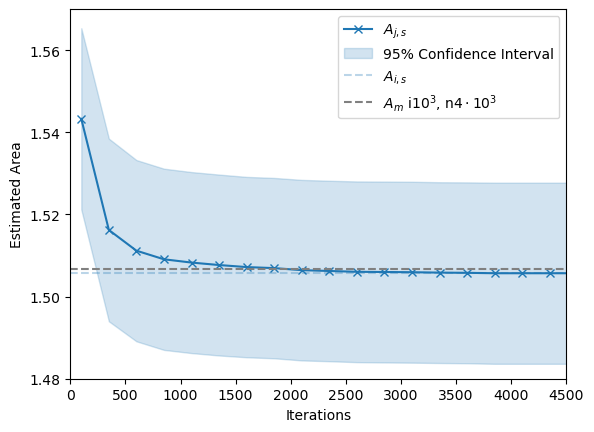

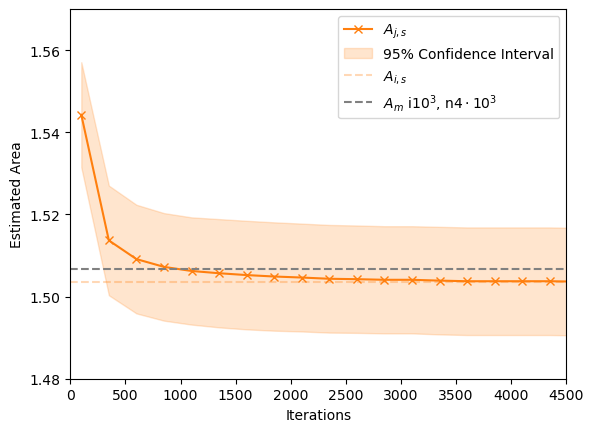

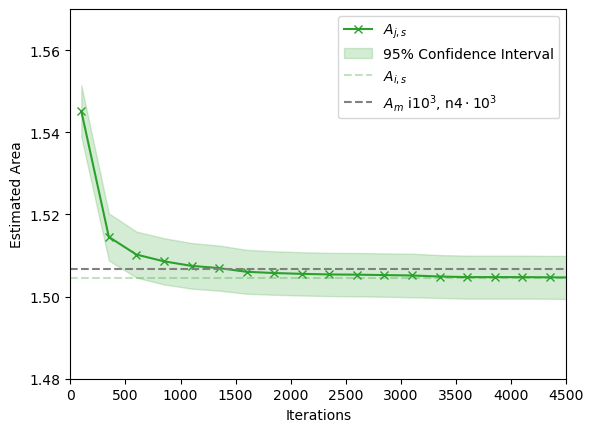

In [128]:
# area_estimate_ir =  1.5052319999999997
# area_estimate_std_ir = np.sqrt(0.0028646454857142864)
# area_estimate_ih = 1.504176
# area_estimate_std_ih = np.sqrt(0.0013527324734693871)
# area_estimate_io = 1.506768
# area_estimate_std_io = np.sqrt(0.00013558099591836769)

area_estimate = 1.506825
area_estimate_std = np.sqrt(4.395535714285722e-06)

files = os.listdir("data/iterations_r")
random = [i for i in files if 'random' in i]
hypercube = [i for i in files if 'hypercube' in i]
orthogonal = [i for i in files if 'orthogonal' in i]

mean = []
sd = []
i_ar = []

method = ['random','hypercube','orthogonal']
for m in method:
    mean = []
    sd = []
    i_ar = []
    if m == 'random':
        files = random
    elif m == 'hypercube':
        files = hypercube
    else: 
        files = orthogonal
    for file in files:

        config = file.replace('Mandlebrot Area Simulations for {} '.format(m),"").replace(".csv","")
        config = config.split(" ")
        n = config[0].replace('n','')
        s = config[1].replace('s','')
        i = config[2].replace('i','')
        i_ar.append(int(float(i)))

        sample = pd.read_csv(os.path.join("data",'iterations_r',file))['Area']
        sample = np.array(sample)
        sample_mean =  expected_value(sample)
        sample_v =  sample_var(sample)
        mean.append(sample_mean)
        sd.append(np.sqrt(sample_v))

    result= sorted(zip(i_ar,mean,sd), key=lambda x: x[0])
    i_ar = [i[0] for i in result]
    mean = [i[1] for i in result]
    sd = [i[2] for i in result]

    plt.plot(i_ar, mean, 'x-', label = "$A_{j,s}$",color = colour_dict[m]) #yerr=sd, capsize=5, marker='.',markersize=10,
    ci_min = mean-sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
    ci_max = mean+sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
    plt.fill_between(i_ar,ci_min,ci_max,alpha=0.2,label = "95% Confidence Interval",color = colour_dict[m])
    plt.hlines(mean[-1],xmin=0,xmax=5000,alpha=0.3,linestyles='dashed',label = "$A_{i,s}$",color = colour_dict[m])
    plt.hlines(area_estimate,xmin=0,xmax=5000,colors='grey',linestyles='dashed',label='$A_{m}$ i$10^3$, n$4 \cdot 10^3$')
    plt.legend(loc='best')
    plt.xlabel("Iterations")
    plt.ylabel("Estimated Area")
    plt.xlim(0,4500)
    plt.ylim(1.48,1.57)
    plt.savefig("{} iterations convergence.png".format(m))
    plt.show()

1.50568704
1.5035904000000002
1.5045887999999998


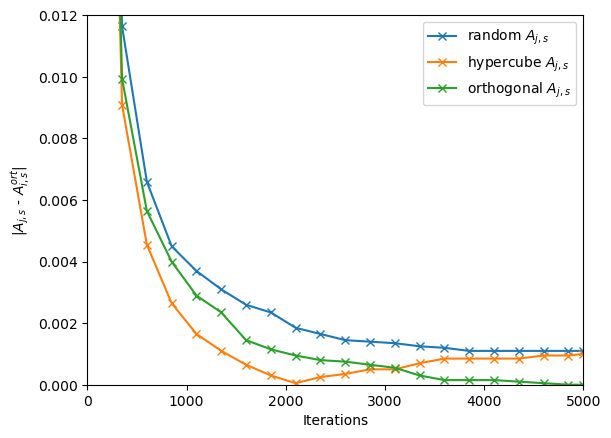

In [129]:
# area_estimate_ir =  1.5052319999999997
# area_estimate_std_ir = np.sqrt(0.0028646454857142864)
# area_estimate_ih = 1.504176
# area_estimate_std_ih = np.sqrt(0.0013527324734693871)
# area_estimate_io = 1.506768
# area_estimate_std_io = np.sqrt(0.00013558099591836769)

area_estimate = 1.506825
area_estimate_std = np.sqrt(4.395535714285722e-06)

files = os.listdir("data/iterations_r")
random = [i for i in files if 'random' in i]
hypercube = [i for i in files if 'hypercube' in i]
orthogonal = [i for i in files if 'orthogonal' in i]

mean = []
sd = []
i_ar = []

method = ['random','hypercube','orthogonal']
for m in method:
    mean = []
    sd = []
    i_ar = []
    if m == 'random':
        files = random
    elif m == 'hypercube':
        files = hypercube
    else: 
        files = orthogonal
    for file in files:

        config = file.replace('Mandlebrot Area Simulations for {} '.format(m),"").replace(".csv","")
        config = config.split(" ")
        n = config[0].replace('n','')
        s = config[1].replace('s','')
        i = config[2].replace('i','')
        i_ar.append(int(float(i)))

        sample = pd.read_csv(os.path.join("data",'iterations_r',file))['Area']
        sample = np.array(sample)
        sample_mean =  expected_value(sample)
        sample_v =  sample_var(sample)
        mean.append(sample_mean)
        sd.append(np.sqrt(sample_v))

    result= sorted(zip(i_ar,mean,sd), key=lambda x: x[0])
    i_ar = [i[0] for i in result]
    mean = [i[1] for i in result]
    sd = [i[2] for i in result]

    plt.plot(i_ar, np.abs(mean - np.ones(len(mean))*1.5045887999999998), 'x-', label=m+ " " +"$A_{j,s}$") #yerr=sd, capsize=5, marker='.',markersize=10,
    print(mean[-1])
    # plt.hlines(mean[-1],xmin=0,xmax=5000,alpha=0.3,linestyles='dashed',label='{} convergence 5000'.format(m))
    # ci_min = mean-sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
    # ci_max = mean+sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
    # plt.fill_between(i_ar,ci_min,ci_max,alpha=0.2,label = "95% Confidence Interval")
# plt.hlines(area_estimate,xmin=0,xmax=5000,colors='grey',linestyles='dashed',label='Best Estimate precision 10.000, samples 40.000')
plt.legend(loc='best')
plt.xlabel("Iterations")
plt.ylabel("$|A_{j,s}$ - $A_{i,s}^{ort}|$")
plt.xlim(0,5000)
plt.ylim(0,0.012)
# plt.yscale("log")
# plt.ylim(1.48,1.57)
plt.savefig("iterations convergence.png")
plt.show()

In [130]:
10e4

100000.0

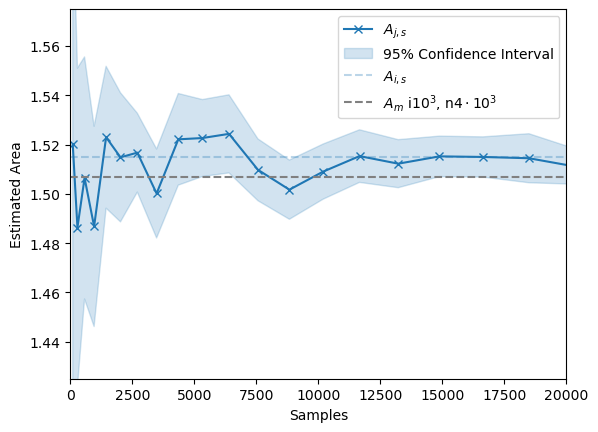

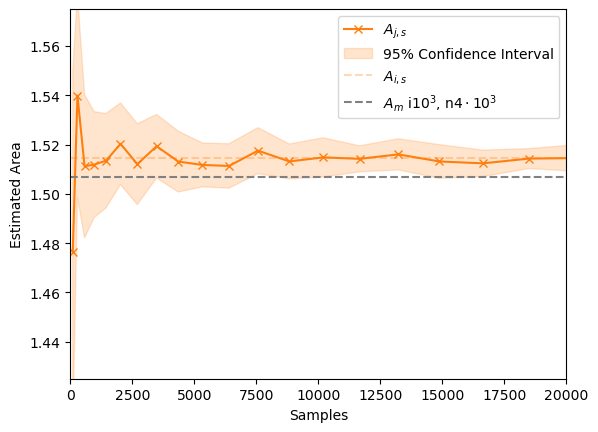

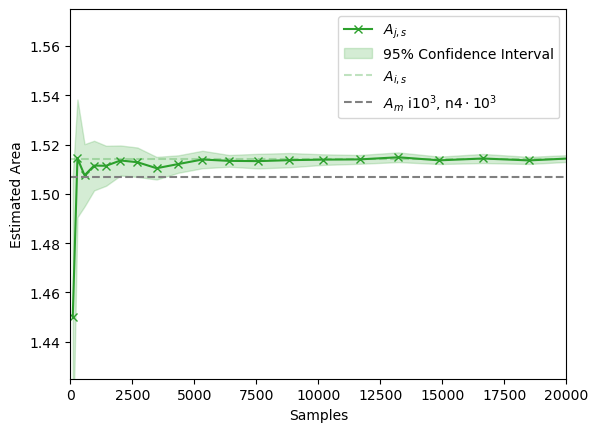

In [131]:
# area_estimate = 1.507040538720539
# area_estimate_std = np.sqrt(8.58439255942656e-06)
# area_estimate = 1.5142122666666669
# area_estimate_std = 0.0026631840115480207
area_estimate = 1.506825
area_estimate_std = np.sqrt(4.395535714285722e-06)

files = os.listdir("data/samples")
random = [i for i in files if 'random' in i]
hypercube = [i for i in files if 'hypercube' in i]
orthogonal = [i for i in files if 'orthogonal' in i]

mean = []
sd = []
i_ar = []

method = ['random','hypercube','orthogonal']
for m in method:
    mean = []
    sd = []
    i_ar = []
    if m == 'random':
        files = random
    elif m == 'hypercube':
        files = hypercube
    else: 
        files = orthogonal
    for file in files:

        config = file.replace('Mandlebrot Area Simulations for {} '.format(m),"").replace(".csv","")
        config = config.split(" ")
        n = config[0].replace('n','')
        s = config[1].replace('s','')
        i = config[2].replace('i','')
        i_ar.append(int(float(n)))

        sample = pd.read_csv(os.path.join("data",'samples',file))['Area']
        sample = np.array(sample)
        sample_mean =  expected_value(sample)
        sample_v =  sample_var(sample)
        mean.append(sample_mean)
        sd.append(np.sqrt(sample_v))

    result= sorted(zip(i_ar,mean,sd), key=lambda x: x[0])
    i_ar = [i[0] for i in result]
    mean = [i[1] for i in result]
    sd = [i[2] for i in result]
    plt.plot(i_ar, mean, 'x-', label="$A_{j,s}$",color = colour_dict[m]) #yerr=sd, capsize=5, marker='.',markersize=10,
    ci_min = mean-sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
    ci_max = mean+sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
    plt.fill_between(i_ar,ci_min,ci_max,alpha=0.2,label = "95% Confidence Interval",color = colour_dict[m])
    plt.hlines(mean[-1],xmin=0,xmax=20000,alpha=0.3,linestyles='dashed',label = "$A_{i,s}$",color = colour_dict[m]) 
    plt.axhline(y = area_estimate, color = 'grey', linestyle = 'dashed', label = "$A_{m}$ i$10^3$, n$4 \cdot 10^3$")
        # plt.fill_between(mean, ci_max, alpha=.1)
    # plt.hlines(1.507040538720539,xmin=0,xmax=5000,colors='grey',linestyles='dashed')
    plt.legend(loc='best')
    plt.xlabel("Samples")
    plt.ylabel("Estimated Area")
    plt.xlim(0,20000)
    plt.ylim(1.425,1.575)
    plt.savefig("Samples {} convergence confidence interval i500 s50.png".format(m))
    plt.show()

[100, 289, 576, 961, 1444, 2025, 2704, 3481, 4356, 5329, 6400, 7569, 8836, 10201, 11664, 13225, 14884, 16641, 18496, 20449, 22500] [1.5200639999999999, 1.4863723183391002, 1.5064833333333332, 1.486821227887617, 1.5230094182825484, 1.5148562962962964, 1.5167538461538461, 1.500181327204826, 1.522153168044077, 1.5226817789453932, 1.5243735, 1.50976837098692, 1.501724219103667, 1.5090755808254093, 1.5153506172839506, 1.5122740264650283, 1.5152417092179522, 1.5149989543897602, 1.5144820069204155, 1.5109594405594404, 1.5149777066666668] [0.2350939002672276, 0.15125890935741468, 0.11486649181133321, 0.09501946581244448, 0.06732698485581391, 0.06124797928541226, 0.03743699452884452, 0.042229245653054866, 0.04348485640420332, 0.03652036169347535, 0.0370621514713282, 0.029322293275663578, 0.028097513217110612, 0.02617131220120769, 0.02496047802254935, 0.02279623195527098, 0.019208831938879036, 0.019073827323396176, 0.023265305580382926, 0.01647878353854594, 0.0177751032653429]
1.5149777066666668

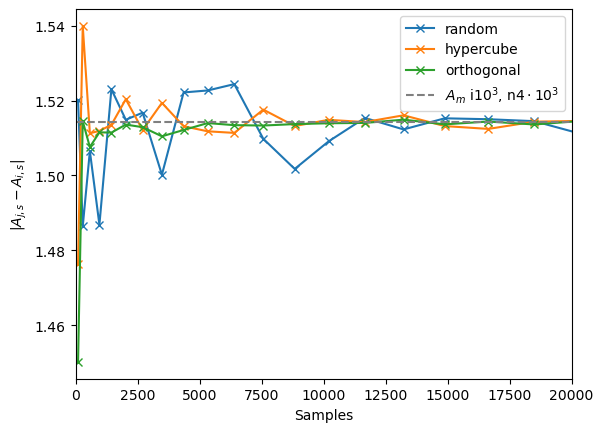

In [132]:
area_estimate = 1.5142122666666669
area_estimate_std = 0.0026631840115480207

files = os.listdir("data/samples")
random = [i for i in files if 'random' in i]
hypercube = [i for i in files if 'hypercube' in i]
orthogonal = [i for i in files if 'orthogonal' in i]

mean = []
sd = []
i_ar = []

method = ['random','hypercube','orthogonal']
for m in method:
    mean = []
    sd = []
    i_ar = []
    if m == 'random':
        files = random
    elif m == 'hypercube':
        files = hypercube
    else: 
        files = orthogonal
    for file in files:

        config = file.replace('Mandlebrot Area Simulations for {} '.format(m),"").replace(".csv","")
        config = config.split(" ")
        n = config[0].replace('n','')
        s = config[1].replace('s','')
        i = config[2].replace('i','')
        i_ar.append(int(float(n)))

        sample = pd.read_csv(os.path.join("data",'samples',file))['Area']
        sample = np.array(sample)
        sample_mean =  expected_value(sample)
        sample_v =  sample_var(sample)
        mean.append(sample_mean)
        sd.append(np.sqrt(sample_v))

    result= sorted(zip(i_ar,mean,sd), key=lambda x: x[0])
    i_ar = [i[0] for i in result]
    mean = [i[1] for i in result]
    sd = [i[2] for i in result]
    print(i_ar,mean,sd)
    plt.plot(i_ar[:-1], mean[:-1], 'x-', label=m,) #yerr=sd, capsize=5, marker='.',markersize=10,
    # ci_min = mean-sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
    # ci_max = mean+sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
    # plt.fill_between(i_ar,np.abs(mean- np.ones(len(mean))*area_estimate)+sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd))),alpha=0.2)
    print(mean[-1],sd[-1])
    # plt.fill_between(mean, ci_max, alpha=.1)
plt.axhline(y = area_estimate, color = 'grey', linestyle = 'dashed', label = "$A_{m}$ i$10^3$, n$4 \cdot 10^3$") 
plt.legend(loc='best')
plt.xlabel("Samples")
plt.xlim(0,20000)
# plt.ylim(0)
plt.ylabel(r'$|A_{j,s} - A_{i,s}|$')
plt.savefig("Samples convergence i500 s50.png")

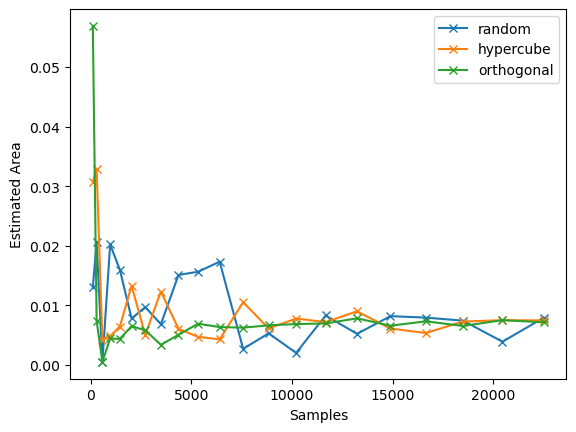

In [133]:
area_estimate = 1.507040538720539
area_estimate_std = np.sqrt(8.58439255942656e-06)

files = os.listdir("data/samples")
random = [i for i in files if 'random' in i]
hypercube = [i for i in files if 'hypercube' in i]
orthogonal = [i for i in files if 'orthogonal' in i]

mean = []
sd = []
i_ar = []

method = ['random','hypercube','orthogonal']
for m in method:
    mean = []
    sd = []
    i_ar = []
    if m == 'random':
        files = random
    elif m == 'hypercube':
        files = hypercube
    else: 
        files = orthogonal
    for file in files:

        config = file.replace('Mandlebrot Area Simulations for {} '.format(m),"").replace(".csv","")
        config = config.split(" ")
        n = config[0].replace('n','')
        s = config[1].replace('s','')
        i = config[2].replace('i','')
        i_ar.append(int(float(n)))

        sample = pd.read_csv(os.path.join("data",'samples',file))['Area']
        sample = np.array(sample)
        sample_mean =  expected_value(sample)
        sample_v =  sample_var(sample)
        mean.append(sample_mean)
        sd.append(np.sqrt(sample_v))

    result= sorted(zip(i_ar,mean,sd), key=lambda x: x[0])
    i_ar = [i[0] for i in result]
    mean = [i[1] for i in result]
    sd = [i[2] for i in result]
    
    plt.plot(i_ar, np.abs(mean-np.ones(len(mean))*area_estimate), 'x-', label=m,)
    # plt.errorbar(i_ar, mean, yerr=sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd))), capsize=5, marker='.',markersize=10, label=m,) #yerr=sd, capsize=5, marker='.',markersize=10,
    # ci_min = mean-sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
    # ci_max = mean+sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
    # plt.fill_between(i_ar,ci_min,ci_max,alpha=0.2)
    # plt.fill_between(mean, ci_max, alpha=.1)
# plt.hlines(1.507040538720539,xmin=0,xmax=5000,colors='grey',linestyles='dashed')
plt.legend(loc='best')
plt.xlabel("Samples")
plt.ylabel("Estimated Area")
plt.savefig("Samples convergence i500 s50.png")
# plt.xlim(0,2000)
# plt.ylim(1.4,1.6)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


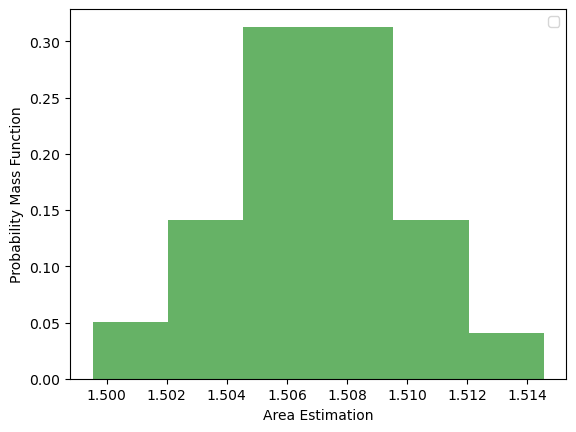

Mean 1.507040538720539 Sample Var 8.58439255942656e-06


In [134]:
best_estimate = pd.read_csv("data/Mandlebrot Area Simulations for orthogonal n22500 s100 i5000.csv")['Area']
best_estimate = np.array(best_estimate)[:-1]

weights = np.ones_like(best_estimate) / len(best_estimate)

binwidth = 0.0025
plt.hist(best_estimate,weights=weights,bins=np.arange(min(best_estimate), max(best_estimate) + binwidth, binwidth),alpha = 0.6,color = 'green')
plt.legend(loc='best')
plt.xlabel("Area Estimation")
plt.ylabel("Probability Mass Function")
# plt.xlim(1.15,1.9)
plt.savefig("images/area reduction best_estimate.png")
plt.show()

print("Mean", expected_value(best_estimate),"Sample Var", sample_var(best_estimate))
best_mean =  expected_value(best_estimate)
best_var =  sample_var(best_estimate)

In [31]:
np.linspace(50,5000,100)

array([  50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,  450.,
        500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
        950., 1000., 1050., 1100., 1150., 1200., 1250., 1300., 1350.,
       1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750., 1800.,
       1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200., 2250.,
       2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650., 2700.,
       2750., 2800., 2850., 2900., 2950., 3000., 3050., 3100., 3150.,
       3200., 3250., 3300., 3350., 3400., 3450., 3500., 3550., 3600.,
       3650., 3700., 3750., 3800., 3850., 3900., 3950., 4000., 4050.,
       4100., 4150., 4200., 4250., 4300., 4350., 4400., 4450., 4500.,
       4550., 4600., 4650., 4700., 4750., 4800., 4850., 4900., 4950.,
       5000.])

In [32]:
random = pd.read_csv("data/raph/Mandlebrot Area Simulations for random n2500 s20 i100000.csv")['Area']
hypercube = pd.read_csv("data/raph/Mandlebrot Area Simulations for hypercube n2500 s20 i100000.csv")['Area']
orthogonal = pd.read_csv("data/raph/Mandlebrot Area Simulations for orthogonal n2500 s20 i100000.csv")['Area']

[]

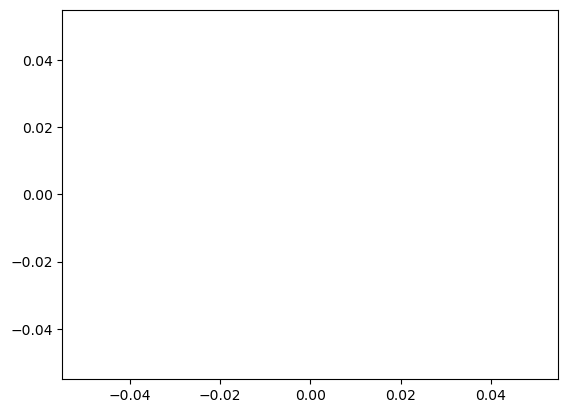

In [33]:
plt.plot()

In [34]:
random = pd.read_csv("data/new area/Mandlebrot Area Simulations for random n2500 s5000 i500.csv")['Area']
hypercube = pd.read_csv("data/new area/Mandlebrot Area Simulations for hypercube n2500 s5000 i500.csv")['Area']
orthogonal = pd.read_csv("data/new area/Mandlebrot Area Simulations for orthogonal n2500 s5000 i500.csv")['Area']

In [35]:
random_s = pd.read_csv("data/new area/Mandlebrot Area Simulations for random n2500 s5000 i500 a.csv")['Area']
hypercube_s = pd.read_csv("data/new area/Mandlebrot Area Simulations for hypercube n2500 s5000 i500 a.csv")['Area']
orthogonal_s = pd.read_csv("data/new area/Mandlebrot Area Simulations for orthogonal n2500 s5000 i500 a.csv")['Area']

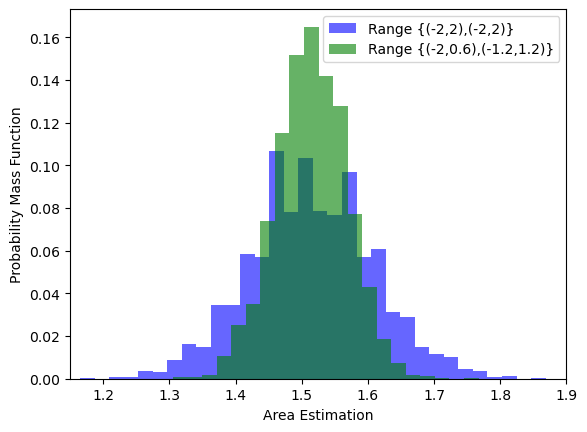

Mean 1.5145014144 Sample Var 0.002882753539657804
Mean 1.5153433600000001 Sample Var 0.008761105493009002


In [36]:
random = np.array(random)
random_s = np.array(random_s)
weights = np.ones_like(random) / len(random)
weights_s = np.ones_like(random_s) / len(random_s)
binwidth = 0.022
plt.hist(random_s,weights=weights_s,bins=np.arange(min(random_s), max(random_s) + binwidth, binwidth),alpha = 0.6,label= "Range {(-2,2),(-2,2)}",color="blue")
plt.hist(random,weights=weights,bins=np.arange(min(random), max(random) + binwidth, binwidth),alpha = 0.6,label= "Range {(-2,0.6),(-1.2,1.2)}",color = 'green')
plt.legend(loc='best')
plt.xlabel("Area Estimation")
plt.ylabel("Probability Mass Function")
plt.xlim(1.15,1.9)
plt.savefig("images/area reduction random.png")
plt.show()

print("Mean", expected_value(random),"Sample Var", sample_var(random))
print("Mean", expected_value(random_s),"Sample Var",sample_var(random_s))

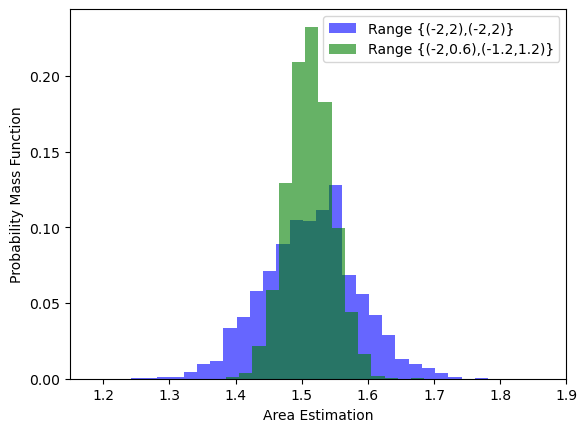

Mean 1.5131321088 Sample Var 0.0011669506663070236
Mean 1.51405952 Sample Var 0.005090414604290458


In [37]:
hypercube = np.array(hypercube)
hypercube_s = np.array(hypercube_s)
weights = np.ones_like(hypercube) / len(hypercube)
weights_s = np.ones_like(hypercube_s) / len(hypercube_s)
binwidth = 0.02
plt.hist(hypercube_s,weights=weights_s,bins=np.arange(min(hypercube_s), max(hypercube_s) + binwidth, binwidth),alpha = 0.6,label=  "Range {(-2,2),(-2,2)}",color="blue")
plt.hist(hypercube,weights=weights,bins=np.arange(min(hypercube), max(hypercube) + binwidth, binwidth),alpha = 0.6,label="Range {(-2,0.6),(-1.2,1.2)}",color = 'green')
plt.legend(loc='best')
plt.xlabel("Area Estimation")
plt.ylabel("Probability Mass Function")
plt.xlim(1.15,1.9)
plt.savefig("images/area reduction hypercube.png")
plt.show()

print("Mean", expected_value(hypercube),"Sample Var", sample_var(hypercube))
print("Mean", expected_value(hypercube_s),"Sample Var",sample_var(hypercube_s))

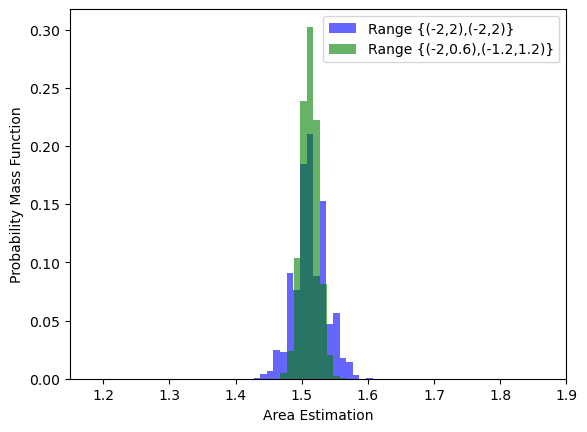

Mean 1.5130277760000002 Sample Var 0.00016411548946691735
Mean 1.5128512 Sample Var 0.0006049327011002205


In [38]:
orthogonal = np.array(orthogonal)
orthogonal_s = np.array(orthogonal_s)
weights = np.ones_like(orthogonal) / len(orthogonal)
weights_s = np.ones_like(orthogonal_s) / len(orthogonal_s)
binwidth = 0.01
plt.hist(orthogonal_s,weights=weights_s,bins=np.arange(min(orthogonal_s), max(orthogonal_s) + binwidth, binwidth),alpha = 0.6,label=  "Range {(-2,2),(-2,2)}",color="blue")
plt.hist(orthogonal,weights=weights,bins=np.arange(min(orthogonal), max(orthogonal) + binwidth, binwidth),alpha = 0.6,label= "Range {(-2,0.6),(-1.2,1.2)}",color = 'green')
plt.legend(loc='best')
plt.xlabel("Area Estimation")
plt.ylabel("Probability Mass Function")
plt.xlim(1.15,1.9)
plt.savefig("images/area reduction orthogonal.png")
plt.show()

print("Mean", expected_value(orthogonal),"Sample Var", sample_var(orthogonal))
print("Mean", expected_value(orthogonal_s),"Sample Var",sample_var(orthogonal_s))

In [39]:
# Size of cell
samples = 32**2
x_min, x_max = (-2,1)
y_min, y_max = (-1,1)
dx = (x_max-x_min)/(samples-1) # width
dy = (y_max-y_min)/(samples-1) # height

# Create subgrids by index
subspaces = int(np.sqrt(samples))
blocks = {(i,j):[(a,b) for a in range(i*subspaces,i*subspaces+subspaces) for b in range(j*subspaces,j*subspaces+subspaces)] 
        for i in range(subspaces) for j in range(subspaces)}


In [40]:
%%time
selected_x=[]
selected_y=[]

for i in range(subspaces):
    for j in range(subspaces):
        options_x = range(i*subspaces,i*subspaces+subspaces)
        options_x = list(set(options_x).difference(set(selected_x)))
        options_y = range(j*subspaces,j*subspaces+subspaces)
        options_y = list(set(options_y).difference(set(selected_y)))
        
        selected_x.append(rd.sample(options_x, k=1)[0])
        selected_y.append(rd.sample(options_y, k=1)[0])

x_pos = x_min + np.array(selected_x)*dx
y_pos = y_min +  np.array(selected_y)*dy

paired_points = list(zip(x_pos,y_pos))

complex_numbers = np.array([complex(a,b) for a, b in paired_points])

CPU times: total: 46.9 ms
Wall time: 49.3 ms
